In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
! pip install pycaret

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 63.9MB 61kB/s 
     |████████████████████████████████| 1.6MB 41.1MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 133kB 35.1MB/s 
     |████████████████████████████████| 3.1MB 36.0MB/s 
     |████████████████████████████████| 7.0MB 41.5MB/s 
     |████████████████████████████████| 389kB 48.5MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
     |████████████████████████████████| 266kB 46.6MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 552kB 44.4MB/s 
     |████████████████████████████████| 2.1MB 37.7MB/s 
     |████████████████████████████████| 604kB 45.9MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 6.2MB 44.2MB/s 
   

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/ML for Banking/train_fNxu4vz.csv')
test = pd.read_csv('/content/drive/My Drive/ML for Banking/test_fjtUOL8.csv')
ss = pd.read_csv('/content/drive/My Drive/ML for Banking/sample_submission_HSqiq1Q.csv')

In [0]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].str.replace(',','').astype(float)
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].str.replace(',','').astype(float)

In [0]:
from pycaret.classification import *

In [40]:
exp_mclf101 = setup(data = train, target = 'Interest_Rate', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(164309, 14)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models(fold=5)

# Top BaseModels

In [0]:
gbc_model = create_model('gbc')
ada_model = create_model('ada')
#lgbm_model = create_model('lightgbm')
xgb_model = create_model('xgboost')
cat_model = create_model('catboost')

In [56]:
#xgb_model = create_model('xgboost')
cat_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5245,0.0,0.4728,0.5231,0.5093,0.2259
1,0.5398,0.0,0.4940,0.5432,0.5284,0.2537
2,0.5312,0.0,0.4831,0.5365,0.5185,0.2369
3,0.5436,0.0,0.4973,0.5477,0.5324,0.2593
4,0.5362,0.0,0.4868,0.5360,0.5233,0.2467
5,0.5255,0.0,0.4778,0.5299,0.5127,0.2281
6,0.5362,0.0,0.4863,0.5405,0.5232,0.2447
7,0.5365,0.0,0.4879,0.5362,0.5235,0.2478
8,0.5267,0.0,0.4826,0.5280,0.5165,0.2335
9,0.5267,0.0,0.4783,0.5271,0.5136,0.2310


# Evaluation

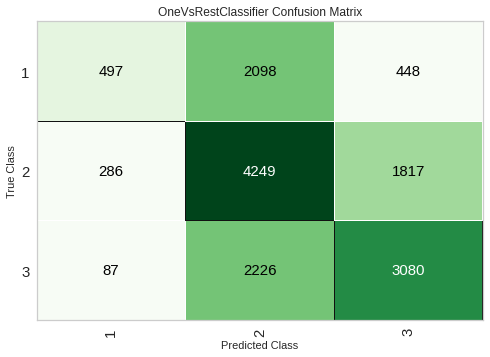

In [43]:
plot_model(gbc_model, plot = 'confusion_matrix')

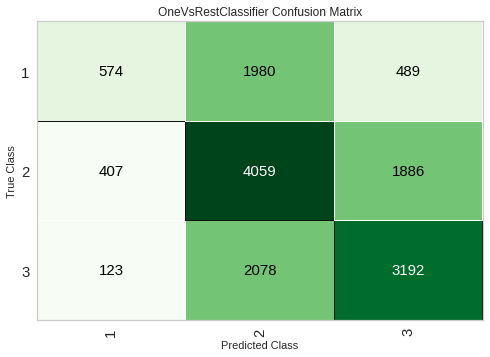

In [44]:
plot_model(ada_model, plot = 'confusion_matrix')

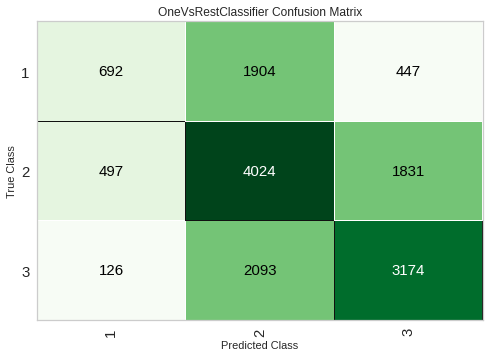

In [45]:
plot_model(lgbm_model, plot = 'confusion_matrix')

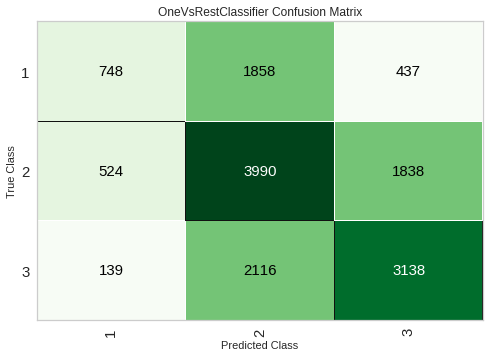

In [59]:
plot_model(cat_model, plot = 'confusion_matrix')

In [0]:
plot_model(xgb_model, plot = 'confusion_matrix')

# Submission

In [0]:
test_preds = predict_model(cat_model,test)['Label']
ss['Interest_Rate'] = test_preds
ss.to_csv('Submission_4_cat_Pycaret.csv',index=False)

# LGBM with weighted F1

In [0]:
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import time
def evaluate_weightedF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='weighted')
    return ('weightedF1', f1, True) 

In [0]:
max_iter = 5
folds = StratifiedKFold(n_splits = max_iter)

oofs = np.zeros(len(train_data))
preds_test = np.zeros(len(test_data))
preds_test1 = np.zeros(len(test_data))

train = train_data.drop(['class'],axis=1)
target = train_data['class']

feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, target.values)):
    
    print(f'\n---- Fold {fold_} -----\n')
    
    fold_start_time = time.time()
    
    X_trn, y_trn = train.iloc[trn_idx], target.iloc[trn_idx]
    X_val, y_val = train.iloc[val_idx], target.iloc[val_idx]
    X_test = test_data #test[features]
    
    print(X_trn.shape)
    
    clf = LGBMClassifier( n_estimators = 5000, learning_rate = 0.01, num_leaves=200, max_depth=4, colsample_by_tree =2, reg_alpha=0.5, reg_lambda=0.5, 
                        bagging_freq=1, bagging_fraction=0.8, max_bin=50)
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_trn, y_trn), (X_val, y_val)], eval_metric = 'logloss', verbose = 100, early_stopping_rounds = 100)
    
    oofs[val_idx] = clf.predict(X_val)
    preds_test += clf.predict_proba(test_data)[:,0]/max_iter
    preds_test1 += clf.predict_proba(test_data)[:,1]/max_iter


    print(f'\n Logloss of validation : {log_loss(y_val,oofs[val_idx])}')

    fold_importance_df = pd.DataFrame({'feature': X_trn.columns.tolist(), 'importance': clf.feature_importances_})
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    fold_end_time = time.time()
    total_fold_time = int(fold_end_time - fold_start_time)
    
    print(f"\n->-> Fold ran for {(total_fold_time)//60} minutes {(total_fold_time)%60} seconds")